In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pubg-version-3/mock_up.csv
/kaggle/input/pubg-version-3/test_up.csv
/kaggle/input/pubg-version-3/train_up.csv


In [3]:
train_df = pd.read_csv("/kaggle/input/pubg-version-3/train_up.csv")

In [4]:
len(train_df)

3112876

In [5]:
train_df.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,...,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112876e+06,3.112875e+06
mean,2.339239e-01,1.107759e+00,1.308017e+02,6.587818e-01,2.268834e-01,1.370783e+00,4.758207e+01,5.050118e+02,9.252460e-01,5.442054e-01,...,1.648183e-01,6.069331e+02,3.505119e-03,4.531070e+00,2.380917e-02,7.908442e-03,1.154895e+03,3.662081e+00,6.064482e+02,4.730654e-01
std,5.887983e-01,1.716308e+00,1.707582e+02,1.146708e+00,6.026371e-01,2.679204e+00,2.746282e+01,6.275414e+02,1.558777e+00,7.111749e-01,...,4.720282e-01,1.500459e+03,7.387977e-02,3.060910e+01,1.672109e-01,9.265749e-02,1.183496e+03,2.459287e+00,7.397138e+02,3.074168e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.553000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.435000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.867000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.862000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.171000e+03,1.000000e+00,1.000000e+00,...,0.000000e+00,3.818250e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.978000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.000000e+02,2.170000e+03,7.200000e+01,2.000000e+01,...,3.900000e+01,4.071000e+04,1.800000e+01,2.718000e+03,1.000000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.001000e+03,1.000000e+00


In [6]:
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [7]:
train_df.drop(axis="rows", labels=train_df.index[train_df["winPlacePerc"].isna()], inplace=True)
train_df.isna().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

# Feature Engineering
Reference :- https://www.kaggle.com/code/rejasupotaro/effective-feature-engineering/notebook

<AxesSubplot:>

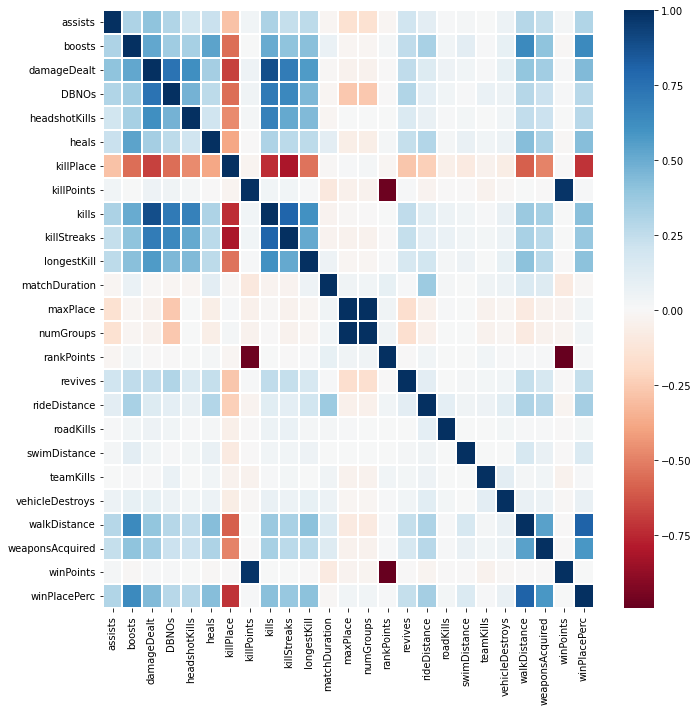

In [8]:
plt.figure(figsize=(11, 11))
sns.heatmap(
    train_df.corr(),
    linewidths=0.1,
    cmap='RdBu',
)

In [9]:
# Adding New Feature "Players_in_a_team" i.e number of player in a group
def player_in_team(df):
    player_in_team = df.groupby("groupId").size().to_frame("players_in_a_team")
    return df.merge(player_in_team,on="groupId")

# Adding new feature for all the healing and boosting items used
def items(df):
    df["items"] = df["heals"] + df["boosts"]
    return df

# Adding feature for total distance travelled
def totalDistance(df):
    df["totalDistance"] = df["walkDistance"] + df["swimDistance"] + df["rideDistance"]
    return df

# Adding new feature of headshot percentage
def headshotperc(df):
    df["headshotPerc"] = df["headshotKills"]/df["kills"]
    df["headshotPerc"] = df["headshotPerc"].fillna(0)
    return df

# Adding new feature of ratio of kill and maxPlace that person can get
def kills_maxPlace(df):
    df["kills/maxPlace"] = df["kills"]/df["maxPlace"]
    df["kills/maxPlace"] = df["kills/maxPlace"].fillna(0)
    return df

# Adding new feature of ratio of totalDistance travelled and kills
def totalDistance_kills(df):
    df["totalDistance/kills"] = df["totalDistance"]/df["kills"]
    df["totalDistance/kills"] = df["totalDistance/kills"].fillna(0)
    df["totalDistance/kills"] = df["totalDistance/kills"].replace(np.inf,0)
    return df
    
# Adding new feature of ratio of totalDistance travelled and items
def totalDistance_items(df):
    df["totalDistance/items"] = df["totalDistance"]/df["items"]
    df["totalDistance/items"] = df["totalDistance/items"].fillna(0)
    df["totalDistance/items"] = df["totalDistance/items"].replace(np.inf,0)
    return df

# Adding new feature of teamHelp, i.e., total number of revives and assists
def teamHelp(df):
    df["teamHelp"] = df["assists"] + df["revives"]
    return df

def matchmode(df):
    def segregator(s):
        if("solo" in s):
            return "solo"
        elif("duo" in s):
            return "duo"
        elif("squad" in s):
            return "squad"
        else:
            return "others"
    
    x = lambda s: segregator(s)

    df['match_mode'] = df['matchType'].map(x)
    dummies = pd.get_dummies(df['match_mode'])
    df = df.join(dummies)
    df = df.drop('match_mode', axis=1)
    return df

def applyFeature(df):
    df = player_in_team(df)
    df = items(df)
    df = totalDistance(df)
    df = headshotperc(df)
    df = kills_maxPlace(df)
    df = totalDistance_kills(df)
    df = totalDistance_items(df)
    df = teamHelp(df)
    df = matchmode(df)
    return df

In [10]:
train_df = applyFeature(train_df)
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,totalDistance,headshotPerc,kills/maxPlace,totalDistance/kills,totalDistance/items,teamHelp,duo,others,solo,squad
0,2a718802964d4d,c1827980642b62,9a78c7efc2795b,0,1,23.54,0,0,1,47,...,2600.0,0.0,0.00000,0.0,1300.00,0,0,0,0,1
1,f216ebaf30ce14,c1827980642b62,9a78c7efc2795b,0,0,0.00,0,0,0,48,...,2269.0,0.0,0.00000,0.0,0.00,0,0,0,0,1
2,368c88b3a4f242,c1827980642b62,9a78c7efc2795b,0,2,23.80,0,0,2,45,...,2639.0,0.0,0.00000,0.0,659.75,0,0,0,0,1
3,a4ea8117a0d762,85ed9d49426dcc,0b08d1f70bc0e4,0,0,46.04,0,0,0,58,...,239.0,0.0,0.00000,0.0,0.00,0,1,0,0,0
4,c10c5a2170b513,85ed9d49426dcc,0b08d1f70bc0e4,0,0,100.00,0,0,0,26,...,374.8,0.0,0.02439,374.8,0.00,0,1,0,0,0


In [11]:
train_df["duo"].value_counts()

0    2191889
1     920986
Name: duo, dtype: int64

In [12]:
train_df["squad"].value_counts()

1    1680175
0    1432700
Name: squad, dtype: int64

In [13]:
train_df["solo"].value_counts()

0    2608034
1     504841
Name: solo, dtype: int64

In [14]:
train_df["players_in_a_team"].max()

52

<AxesSubplot:xlabel='players_in_a_team', ylabel='winPlacePerc'>

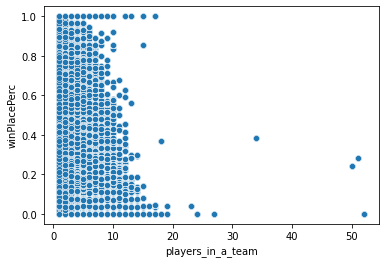

In [15]:
sns.scatterplot(data = train_df,x = "players_in_a_team",y = "winPlacePerc")

In [16]:
train_df = train_df[train_df["players_in_a_team"] <= 4]
len(train_df)

2819497

<AxesSubplot:xlabel='players_in_a_team', ylabel='winPlacePerc'>

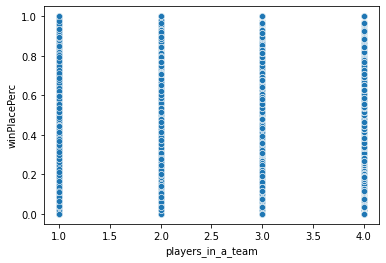

In [17]:
sns.scatterplot(data = train_df,x = "players_in_a_team",y = "winPlacePerc")

<AxesSubplot:xlabel='items', ylabel='winPlacePerc'>

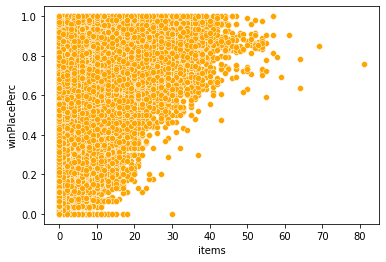

In [18]:
sns.scatterplot(data = train_df,x = "items",y = "winPlacePerc",color="orange")

In [19]:
train_df = train_df[train_df["items"] <60]
len(train_df)

2819492

<AxesSubplot:xlabel='items', ylabel='winPlacePerc'>

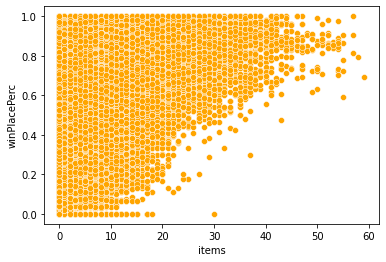

In [20]:
sns.scatterplot(data = train_df,x = "items",y = "winPlacePerc",color="orange")

<AxesSubplot:xlabel='totalDistance', ylabel='winPlacePerc'>

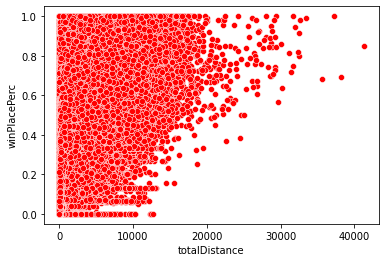

In [21]:
sns.scatterplot(data = train_df,x = "totalDistance",y = "winPlacePerc",color="red")

In [22]:
train_df = train_df[train_df["totalDistance"] <27000]
len(train_df)

2819452

<AxesSubplot:xlabel='totalDistance', ylabel='winPlacePerc'>

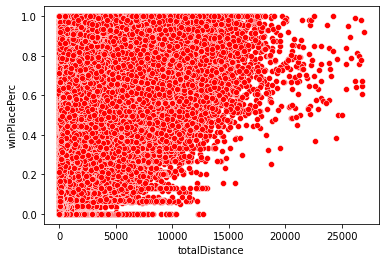

In [23]:
sns.scatterplot(data = train_df,x = "totalDistance",y = "winPlacePerc",color="red")

<AxesSubplot:xlabel='headshotPerc', ylabel='winPlacePerc'>

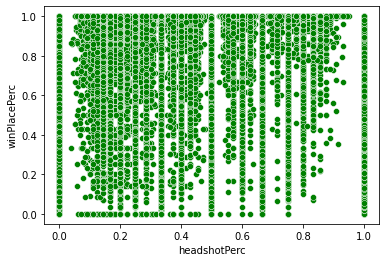

In [24]:
sns.scatterplot(data = train_df,x = "headshotPerc",y = "winPlacePerc",color="green")

<AxesSubplot:xlabel='kills/maxPlace', ylabel='winPlacePerc'>

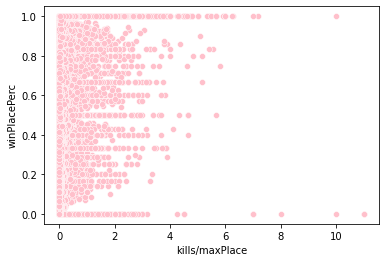

In [25]:
sns.scatterplot(data = train_df,x = "kills/maxPlace",y = "winPlacePerc",color="pink")

In [26]:
train_df = train_df[train_df["kills/maxPlace"] < 3]
len(train_df)

2819295

<AxesSubplot:xlabel='kills/maxPlace', ylabel='winPlacePerc'>

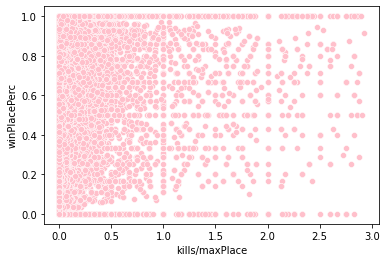

In [27]:
sns.scatterplot(data = train_df,x = "kills/maxPlace",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='totalDistance/kills', ylabel='winPlacePerc'>

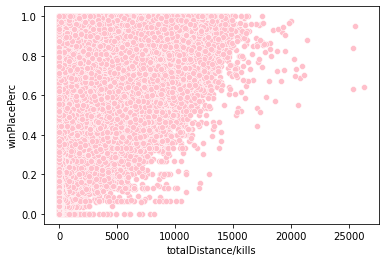

In [28]:
sns.scatterplot(data = train_df,x = "totalDistance/kills",y = "winPlacePerc",color="pink")

In [29]:
train_df = train_df[train_df["totalDistance/kills"] < 15000]
len(train_df)

2819163

<AxesSubplot:xlabel='totalDistance/kills', ylabel='winPlacePerc'>

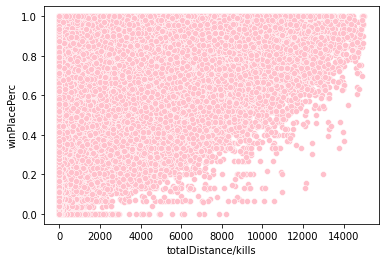

In [30]:
sns.scatterplot(data = train_df,x = "totalDistance/kills",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='totalDistance/items', ylabel='winPlacePerc'>

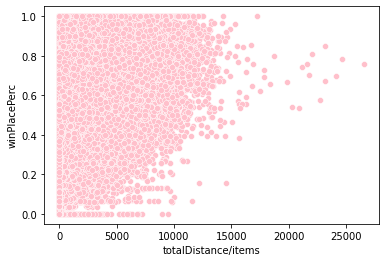

In [31]:
sns.scatterplot(data = train_df,x = "totalDistance/items",y = "winPlacePerc",color="pink")

In [32]:
train_df = train_df[train_df["totalDistance/items"] < 15000]
len(train_df)

2819125

<AxesSubplot:xlabel='totalDistance/items', ylabel='winPlacePerc'>

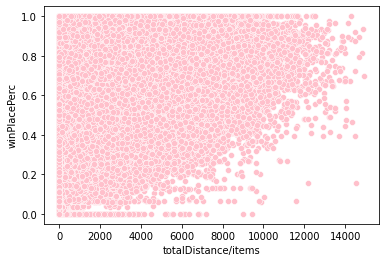

In [33]:
sns.scatterplot(data = train_df,x = "totalDistance/items",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='teamHelp', ylabel='winPlacePerc'>

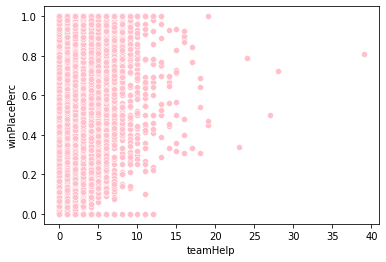

In [34]:
sns.scatterplot(data = train_df,x = "teamHelp",y = "winPlacePerc",color="pink")

In [35]:
train_df = train_df[train_df["teamHelp"] < 15]
len(train_df)

2819093

<AxesSubplot:xlabel='teamHelp', ylabel='winPlacePerc'>

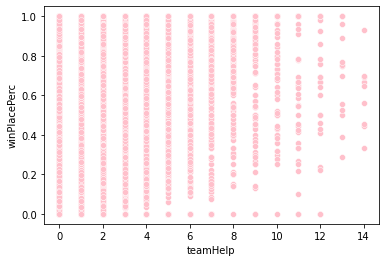

In [36]:
sns.scatterplot(data = train_df,x = "teamHelp",y = "winPlacePerc",color="pink")

In [37]:
train_df.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc', 'players_in_a_team',
       'items', 'totalDistance', 'headshotPerc', 'kills/maxPlace',
       'totalDistance/kills', 'totalDistance/items', 'teamHelp', 'duo',
       'others', 'solo', 'squad'],
      dtype='object')

<AxesSubplot:xlabel='assists', ylabel='winPlacePerc'>

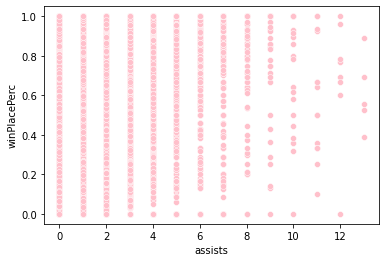

In [38]:
sns.scatterplot(data = train_df,x = "assists",y = "winPlacePerc",color="pink")

In [39]:
train_df = train_df[train_df["assists"] <= 10]
len(train_df)

2819066

<AxesSubplot:xlabel='assists', ylabel='winPlacePerc'>

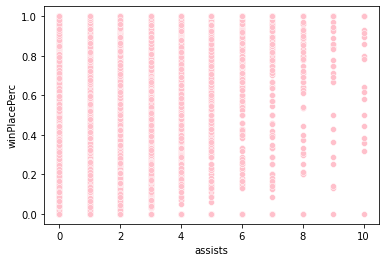

In [40]:
sns.scatterplot(data = train_df,x = "assists",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='boosts', ylabel='winPlacePerc'>

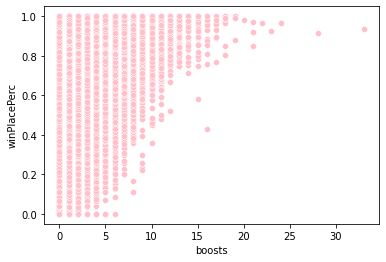

In [41]:
sns.scatterplot(data = train_df,x = "boosts",y = "winPlacePerc",color="pink")

In [42]:
train_df = train_df[train_df["boosts"] <= 17]
len(train_df)

2819042

<AxesSubplot:xlabel='boosts', ylabel='winPlacePerc'>

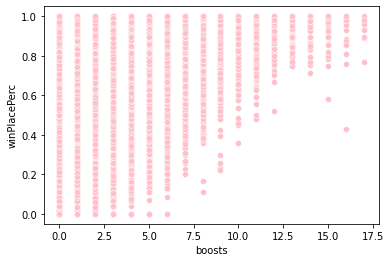

In [43]:
sns.scatterplot(data = train_df,x = "boosts",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='damageDealt', ylabel='winPlacePerc'>

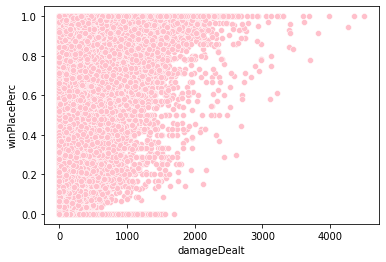

In [44]:
sns.scatterplot(data = train_df,x = "damageDealt",y = "winPlacePerc",color="pink")

In [45]:
train_df = train_df[train_df["damageDealt"] <= 3500]
len(train_df)

2819033

<AxesSubplot:xlabel='damageDealt', ylabel='winPlacePerc'>

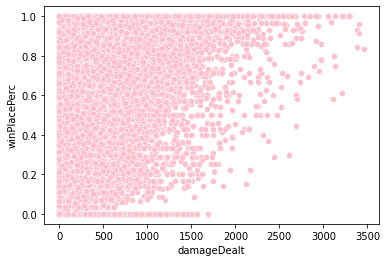

In [46]:
sns.scatterplot(data = train_df,x = "damageDealt",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='DBNOs', ylabel='winPlacePerc'>

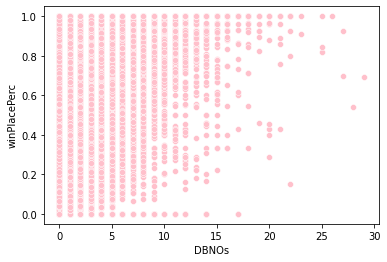

In [47]:
sns.scatterplot(data = train_df,x = "DBNOs",y = "winPlacePerc",color="pink")

In [48]:
train_df = train_df[train_df["DBNOs"] < 25]
len(train_df)

2819025

<AxesSubplot:xlabel='DBNOs', ylabel='winPlacePerc'>

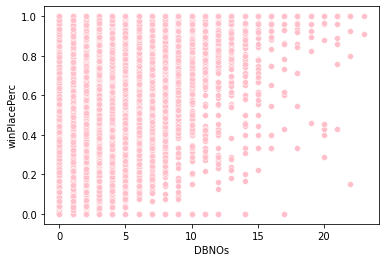

In [49]:
sns.scatterplot(data = train_df,x = "DBNOs",y = "winPlacePerc",color="pink")

<AxesSubplot:xlabel='headshotKills', ylabel='winPlacePerc'>

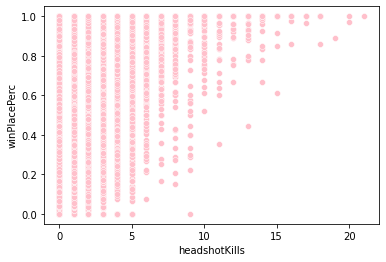

In [50]:
sns.scatterplot(data = train_df,x = "headshotKills",y = "winPlacePerc",color="pink")

In [51]:
train_df = train_df[train_df["DBNOs"] < 15]
len(train_df)

2818821

<AxesSubplot:xlabel='headshotKills', ylabel='winPlacePerc'>

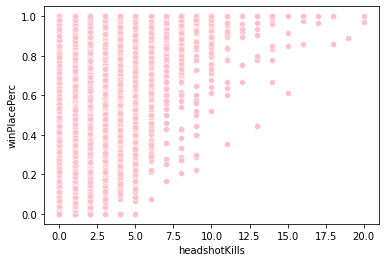

In [52]:
sns.scatterplot(data = train_df,x = "headshotKills",y = "winPlacePerc",color="pink")

In [53]:
def fit_csv(model,name):
    test_df = pd.read_csv("/kaggle/input/pubg-version-3/test_up.csv")
    answer = test_df["Id"]
    test_df = applyFeature(test_df)
    test_df = test_df.drop(columns={"Id","matchId","groupId","matchType"})    
    test_df = (test_df - test_df.min())/(test_df.max() - test_df.min())
    prediction = model.predict(test_df)
    
    test_df = test_df.drop(columns = test_df.columns,axis=1)
    
    test_df["Id"] = answer
    test_df["winPlacePerc"] = prediction
    
    test_df.to_csv('./'+name,index=False)

In [54]:
def fit_model(model,X,Y,output_csv):
    train_x,test_x,train_y,test_y = train_test_split(X,Y,test_size=0.1)
    model.fit(train_x,train_y)
    predict_y = model.predict(test_x)
    mse = mean_squared_error(test_y, predict_y) 
    print("MEAN SQUARED ERROR :-", mse)
    fit_csv(model,output_csv)
    print("CSV created in drive")

In [55]:
train_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,totalDistance,headshotPerc,kills/maxPlace,totalDistance/kills,totalDistance/items,teamHelp,duo,others,solo,squad
0,2a718802964d4d,c1827980642b62,9a78c7efc2795b,0,1,23.54,0,0,1,47,...,2600.0,0.0,0.00000,0.0,1300.00,0,0,0,0,1
1,f216ebaf30ce14,c1827980642b62,9a78c7efc2795b,0,0,0.00,0,0,0,48,...,2269.0,0.0,0.00000,0.0,0.00,0,0,0,0,1
2,368c88b3a4f242,c1827980642b62,9a78c7efc2795b,0,2,23.80,0,0,2,45,...,2639.0,0.0,0.00000,0.0,659.75,0,0,0,0,1
3,a4ea8117a0d762,85ed9d49426dcc,0b08d1f70bc0e4,0,0,46.04,0,0,0,58,...,239.0,0.0,0.00000,0.0,0.00,0,1,0,0,0
4,c10c5a2170b513,85ed9d49426dcc,0b08d1f70bc0e4,0,0,100.00,0,0,0,26,...,374.8,0.0,0.02439,374.8,0.00,0,1,0,0,0


In [56]:
train_df = train_df.sample(frac=1)
x = train_df.drop(columns=["Id","matchId","groupId","matchType","winPlacePerc"],axis=1)
x = (x - x.min())/(x.max() - x.min())
y = train_df["winPlacePerc"]

In [57]:
import lightgbm as lgbm

hyper_params = {
    'objective': 'regression',
    'learning_rate': 0.01,
    "num_leaves": 512,  
    "n_jobs": -1,
    "n_estimators" : 500,
#     random_state:'RANDOM_STATE'
}

l = lgbm.LGBMRegressor(**hyper_params)
fit_model(l,x,y,"lgbm_regr.csv")

MEAN SQUARED ERROR :- 0.006422448032627079
CSV created in drive


In [58]:
import lightgbm as lgbm

hyper_params = {
    'objective': 'regression',
    'learning_rate': 0.01,
    "num_leaves": 512,  
    "n_jobs": -1,
    "n_estimators" : 500,
#     random_state:'RANDOM_STATE'
}

l = lgbm.LGBMRegressor(**hyper_params)
fit_model(l,x,y,"lgbm_regr.csv")

MEAN SQUARED ERROR :- 0.006413107507763348
CSV created in drive


In [59]:
from sklearn.ensemble import RandomForestRegressor

hyper_params = {
    'max_depth':10,
    'random_state':2
}

random_forest = RandomForestRegressor(**hyper_params)
fit_model(random_forest,x,y,"random_forest.csv")

MEAN SQUARED ERROR :- 0.009055317118137113
CSV created in drive
